In [213]:
import pandas as pd
import numpy as np
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer, util
import json
import pyodbc


In [214]:
df_q=pd.read_excel('C://Users//DanukaDilshanRathnay//Desktop//AI-Driven-Job-Role-Fit-Prediction//Merge_data_new8.xlsx')


In [215]:
df_q.head()

,EmployeeCode,Technical Score_JD,Programming Score_JD,Soft Score_with_JD,Education_match_Score_with_JD,Gender,Age,Department,JobCategory,ProficiencyLevel,...,Total Experience in Years,Number of Goal Assigned,Number of Goals Achieved,Final Score,Goals Score,Competency Score,Cultural Value Score,Additional Accomplishment Score,Potential Assessment Score,Trait Assessment Score
0,EMP9000,0.075417,0.000000,0.493587,0.708484,Female,26,Software Engineering,QA,Junior,...,4,4,3,36.681817,75.000000,17.844150,68.416057,2.63,52.160217,51.929840
1,EMP9001,0.088751,0.000000,0.354090,0.631961,Male,23,Software Engineering,UI/UX Designer,Junior,...,1,1,0,36.608857,0.000000,17.325032,72.761340,8.69,11.865769,43.962065
2,EMP9002,0.024108,0.255731,0.450265,0.644765,Female,36,Software Engineering,Backend Developer,Mid-Level,...,14,14,6,35.000000,42.857143,28.853988,62.994583,5.81,36.031158,46.087419
3,EMP9004,0.514297,0.722849,0.379506,0.614774,Male,41,Data and AI,Data Scientist,Senior,...,19,10,7,35.000000,70.000000,34.180251,76.488103,7.08,51.806653,55.141563
4,EMP9005,0.229454,0.787505,0.420458,0.644765,Female,33,Data and AI,Data Engineer,Mid-Level,...,11,10,5,35.000000,50.000000,30.775600,63.895969,1.63,40.425636,54.988743


In [216]:
df_q.isna().sum()

EmployeeCode                               0
Technical Score_JD                         0
Programming Score_JD                       0
Soft Score_with_JD                         0
Education_match_Score_with_JD              0
Gender                                     0
Age                                        0
Department                                 0
JobCategory                                0
ProficiencyLevel                           0
Education Qualifications                   0
Years of Experience in this Company        0
List of Software Skills                    5
Projects Completed                         0
Professional Qualifications               80
KPI                                        0
Absentism Rate                             0
Employee Satisfaction Score                0
Experience in Years Previous Positions     0
Total Experience in Years                  0
Number of Goal Assigned                    0
Number of Goals Achieved                   0
Final Scor

In [217]:
# pip install sentence_transformers,tf-keras



In [218]:
# pip install pyodbc


### meassure the similarity between job descrption and Employees

In [219]:
server = 'DESKTOP-2DSGQFI'
driver = '{ODBC Driver 17 for SQL Server}'
default_database = 'ABC_Company'
connection_string = f"DRIVER={driver};SERVER={server};DATABASE={default_database};Trusted_Connection=yes"

conn = pyodbc.connect(connection_string, autocommit=True)
cursor = conn.cursor()
print("Connected to SQL Server")
def get_jd_data():
    query = "SELECT details FROM JD_Collection WHERE possition='Data Scientist'"
    return pd.read_sql(query, conn)

# Fetch Job Description data
df_jd = get_jd_data()
conn.close()

Connected to SQL Server


C:\Users\DanukaDilshanRathnay\AppData\Local\Temp\ipykernel_14692\3516608023.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [220]:
df1 = pd.read_excel('C://Users//DanukaDilshanRathnay//Desktop//AI-Driven-Job-Role-Fit-Prediction//com//Employee8.xlsx')
df1.head()

,EmployeeCode,FullName,Gender,Age,Department,JobCategory,ProficiencyLevel,Education Qualifications,Years of Experience in this Company,List of Technical Skills,...,Total Experience in Years,Number of Goal Assigned,Number of Goals Achieved,Final Score,Goals Score,Competency Score,Cultural Value Score,Additional Accomplishment Score,Potential Assessment Score,Trait Assessment Score
0,EMP9449,Tyler Pittman,Male,58,Data and AI,Data Engineer,Expert,"Bachelor of Applied Statistics, PhD in Statistics",10,"Spark, SQL, AWS",...,36,15,7,35.344631,46.666667,21.816859,75.686166,0.51,32.121590,50.741435
1,EMP9597,Courtney Mendoza,Male,30,Software Engineering,Backend Developer,Mid-Level,"Bachelor of Computer Science, Master of AI",7,"Spring Boot, Django, Node.js",...,8,10,4,43.376653,40.000000,22.354835,71.285226,2.04,34.714279,57.478542
2,EMP9205,James Marquez,Male,42,Software Engineering,Frontend Developer,Senior,"Bachelor of Science, Master of AI",16,"JavaScript, CSS, React",...,20,15,12,55.821408,80.000000,35.170258,70.046690,8.98,56.593523,50.741882
3,EMP9881,Tina Walker,Female,46,Software Engineering,UI/UX Designer,Senior,"Bachelor of Software Engineering, Master of Co...",7,"Wireframing, Adobe XD, Figma",...,24,15,7,42.219009,46.666667,22.760613,61.127338,3.58,26.601484,48.287450
4,EMP9883,William Moore,Male,24,Data and AI,Data Scientist,Junior,"Bachelor of Engineering, Master of Data Analytics",2,"Pandas, Deep Learning, Python",...,2,2,0,35.000000,0.000000,17.464617,71.723773,5.74,0.000000,52.346808


In [221]:
# Ensure job descriptions are extracted correctly
job_descriptions = df_jd['details'].tolist()
# df1 = pd.read_excel('C://Users//DanukaDilshanRathnay//Desktop//AI-Driven-Job-Role-Fit-Prediction//com//Employee6.xlsx')


columns_to_use = [
    'EmployeeCode', 'FullName', 'Gender', 'Age',"Department",
    'JobCategory', 'ProficiencyLevel', 'Education Qualifications',
    'Professional Qualifications', 'Total Experience in Years',
    'List of Technical Skills', 'List of Programming Skills',
    'List of Software Skills', 'List of Soft Skills', 'Projects Completed'
]
df1 = df1[columns_to_use]


df1.fillna("", inplace=True)


def format_employee_profile(row):
    profile_dict = {
        # "Full Name": row['FullName'],
        # "Age": row['Age'],
        "Department": row['Department'],
        "Job Category": row['JobCategory'],
        "Proficiency Level": row['ProficiencyLevel'],
        "Education": row['Education Qualifications'],
        "Professional Certifications": row['Professional Qualifications'],
        "Total Experience (Years)": row['Total Experience in Years'],
        "Technical Skills": row['List of Technical Skills'],
        "Programming Skills": row['List of Programming Skills'],
        "Software Skills": row['List of Software Skills'],
        "Soft Skills": row['List of Soft Skills'],
        "Projects Completed": row['Projects Completed']
    }
    return json.dumps(profile_dict, ensure_ascii=False, indent=4)

# Apply formatting function to generate textual profiles
df1["EmployeeProfileText"] = df1.apply(format_employee_profile, axis=1)


In [222]:
# Load the SentenceTransformer model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Compute embeddings for employee profiles
employee_embeddings = model.encode(df1['EmployeeProfileText'].tolist(), convert_to_tensor=True)

# Compute similarity scores with each job description
similarity_scores = []
for emp_emb in employee_embeddings:
    scores = [util.cos_sim(emp_emb, model.encode(jd, convert_to_tensor=True)).item() for jd in job_descriptions]
    similarity_scores.append(max(scores))  # Store the highest similarity score

# Store similarity scores in the dataframe
df1['JD match Score'] = similarity_scores
df1.to_excel("matchscore.xlsx",index=False)

In [223]:
df_jdmatch=df1[["EmployeeCode",'JD match Score']]
df_jdmatch.head()

,EmployeeCode,JD match Score
0,EMP9449,0.653565
1,EMP9597,0.450194
2,EMP9205,0.372268
3,EMP9881,0.437849
4,EMP9883,0.590605


In [224]:
# add jd match score to similarity messure file

# df = pd.merge(df_q, df_jdmatch, on="EmployeeCode")
df=df_q

In [225]:
df.columns

Index(['EmployeeCode', 'Technical Score_JD', 'Programming Score_JD',
       'Soft Score_with_JD', 'Education_match_Score_with_JD', 'Gender', 'Age',
       'Department', 'JobCategory', 'ProficiencyLevel',
       'Education Qualifications', 'Years of Experience in this Company',
       'List of Software Skills', 'Projects Completed',
       'Professional Qualifications', 'KPI', 'Absentism Rate',
       'Employee Satisfaction Score', 'Experience in Years Previous Positions',
       'Total Experience in Years', 'Number of Goal Assigned',
       'Number of Goals Achieved', 'Final Score', 'Goals Score',
       'Competency Score', 'Cultural Value Score',
       'Additional Accomplishment Score', 'Potential Assessment Score',
       'Trait Assessment Score'],
      dtype='object')

In [226]:
# import matplotlib.pyplot as plt
# plt.scatter(df['JD match Score'],df['Final Score'])

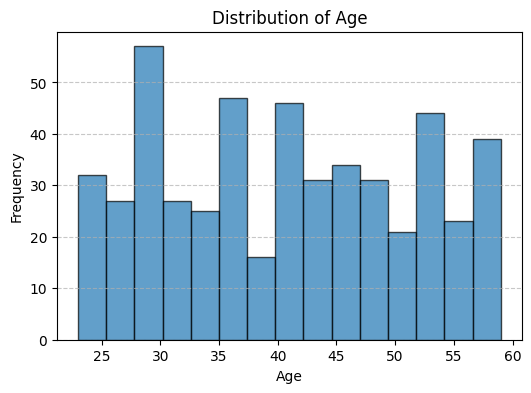

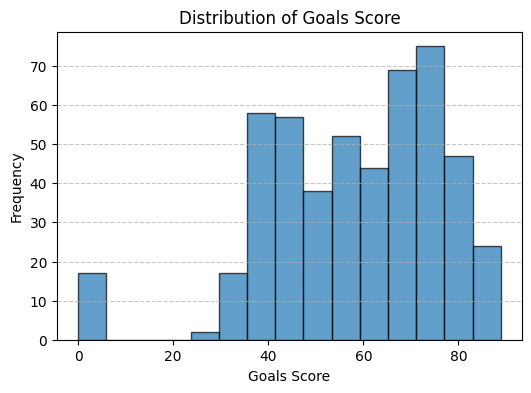

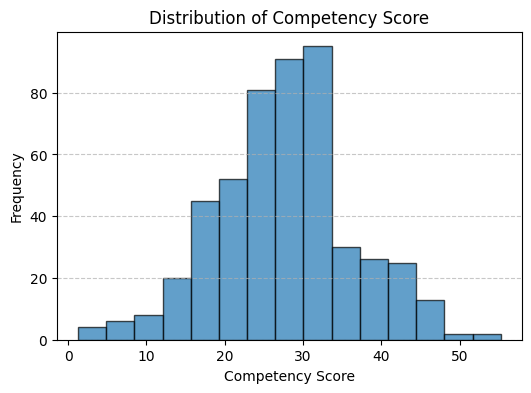

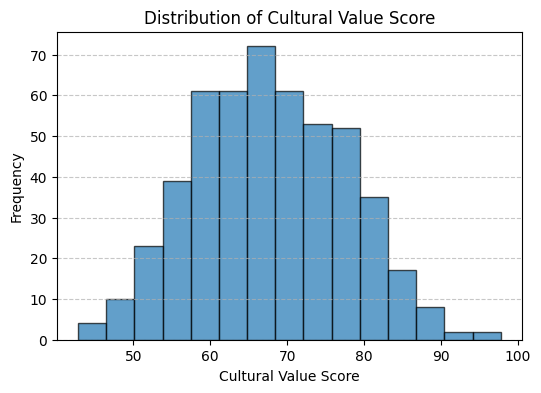

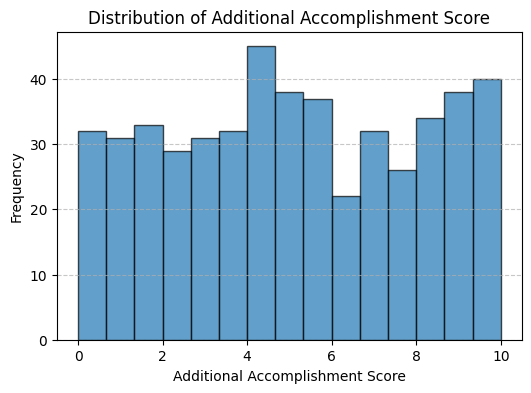

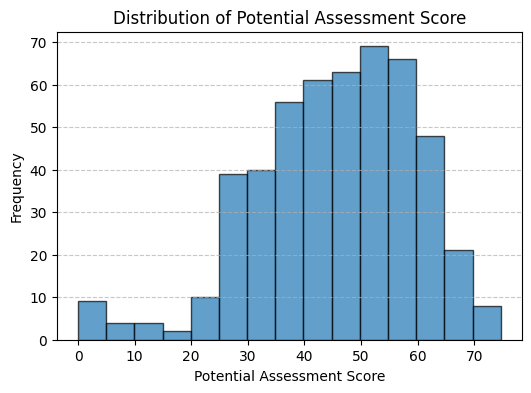

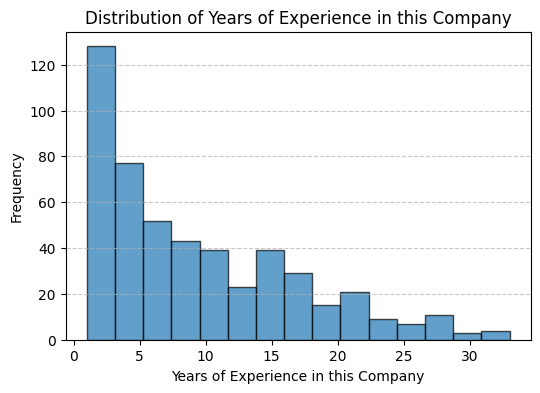

In [227]:
import matplotlib.pyplot as plt

col = ["Age", 'Goals Score', 'Competency Score', 'Cultural Value Score',
       'Additional Accomplishment Score', 'Potential Assessment Score', 'Years of Experience in this Company']

for var in col:
    plt.figure(figsize=(6, 4))  # Optional: Adjust figure size
    plt.hist(df[var], bins=15, edgecolor='black', alpha=0.7)  # Bins can be adjusted as needed
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {var}")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


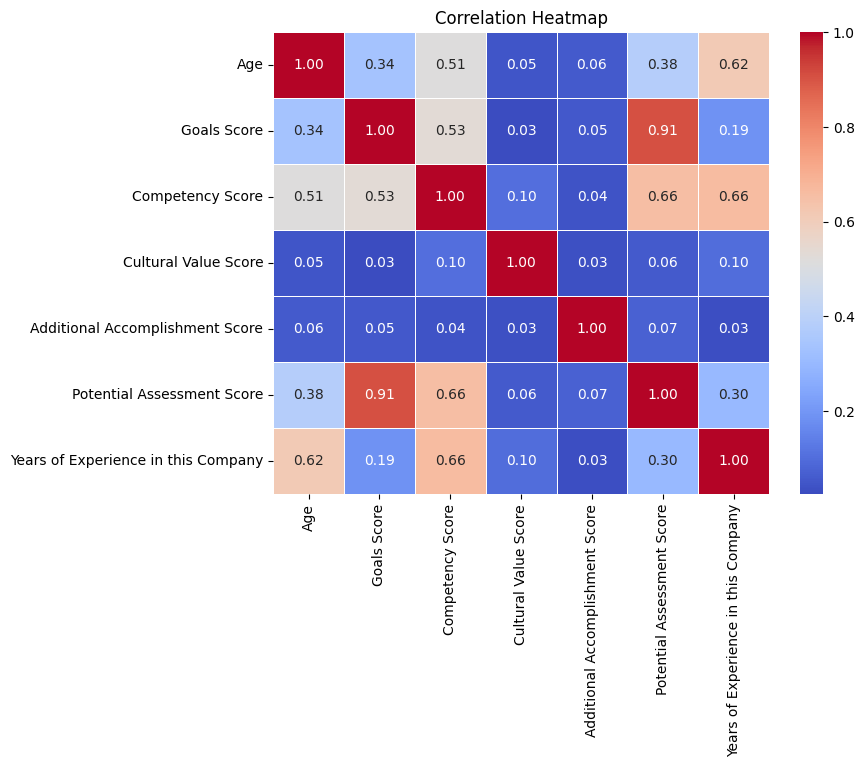

In [228]:
import seaborn as sns
dfjj=df[col].corr()
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.heatmap(dfjj, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap")
plt.show()

In [229]:
df.to_excel("abc.xlsx",index=False)

In [230]:
df.head()

,EmployeeCode,Technical Score_JD,Programming Score_JD,Soft Score_with_JD,Education_match_Score_with_JD,Gender,Age,Department,JobCategory,ProficiencyLevel,...,Total Experience in Years,Number of Goal Assigned,Number of Goals Achieved,Final Score,Goals Score,Competency Score,Cultural Value Score,Additional Accomplishment Score,Potential Assessment Score,Trait Assessment Score
0,EMP9000,0.075417,0.000000,0.493587,0.708484,Female,26,Software Engineering,QA,Junior,...,4,4,3,36.681817,75.000000,17.844150,68.416057,2.63,52.160217,51.929840
1,EMP9001,0.088751,0.000000,0.354090,0.631961,Male,23,Software Engineering,UI/UX Designer,Junior,...,1,1,0,36.608857,0.000000,17.325032,72.761340,8.69,11.865769,43.962065
2,EMP9002,0.024108,0.255731,0.450265,0.644765,Female,36,Software Engineering,Backend Developer,Mid-Level,...,14,14,6,35.000000,42.857143,28.853988,62.994583,5.81,36.031158,46.087419
3,EMP9004,0.514297,0.722849,0.379506,0.614774,Male,41,Data and AI,Data Scientist,Senior,...,19,10,7,35.000000,70.000000,34.180251,76.488103,7.08,51.806653,55.141563
4,EMP9005,0.229454,0.787505,0.420458,0.644765,Female,33,Data and AI,Data Engineer,Mid-Level,...,11,10,5,35.000000,50.000000,30.775600,63.895969,1.63,40.425636,54.988743


In [231]:
df=df[df["Department"]=="Data and AI"]
df.head()

,EmployeeCode,Technical Score_JD,Programming Score_JD,Soft Score_with_JD,Education_match_Score_with_JD,Gender,Age,Department,JobCategory,ProficiencyLevel,...,Total Experience in Years,Number of Goal Assigned,Number of Goals Achieved,Final Score,Goals Score,Competency Score,Cultural Value Score,Additional Accomplishment Score,Potential Assessment Score,Trait Assessment Score
3,EMP9004,0.514297,0.722849,0.379506,0.614774,Male,41,Data and AI,Data Scientist,Senior,...,19,10,7,35.000000,70.000000,34.180251,76.488103,7.08,51.806653,55.141563
4,EMP9005,0.229454,0.787505,0.420458,0.644765,Female,33,Data and AI,Data Engineer,Mid-Level,...,11,10,5,35.000000,50.000000,30.775600,63.895969,1.63,40.425636,54.988743
6,EMP9009,0.413824,0.722849,0.586283,0.653466,Male,35,Data and AI,Data Scientist,Mid-Level,...,13,7,3,35.000000,42.857143,20.708582,57.979997,8.01,30.443135,36.977535
9,EMP9015,0.451817,0.539208,0.558488,0.661025,Male,42,Data and AI,Data Scientist,Senior,...,20,10,5,35.000000,50.000000,18.998407,66.495545,5.71,43.893732,45.595596
11,EMP9021,0.162984,0.539208,0.382562,0.760446,Male,59,Data and AI,Data Analyst,Expert,...,37,15,11,56.717347,73.333333,32.126666,78.174790,2.63,61.771810,50.283365


In [232]:
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df,test_size=0.2,random_state=123)
print("Train Size:",train_df.shape)
print("Test Size:",test_df.shape)

Train Size: (192, 29)
Test Size: (48, 29)


In [233]:
train_df.columns

Index(['EmployeeCode', 'Technical Score_JD', 'Programming Score_JD',
       'Soft Score_with_JD', 'Education_match_Score_with_JD', 'Gender', 'Age',
       'Department', 'JobCategory', 'ProficiencyLevel',
       'Education Qualifications', 'Years of Experience in this Company',
       'List of Software Skills', 'Projects Completed',
       'Professional Qualifications', 'KPI', 'Absentism Rate',
       'Employee Satisfaction Score', 'Experience in Years Previous Positions',
       'Total Experience in Years', 'Number of Goal Assigned',
       'Number of Goals Achieved', 'Final Score', 'Goals Score',
       'Competency Score', 'Cultural Value Score',
       'Additional Accomplishment Score', 'Potential Assessment Score',
       'Trait Assessment Score'],
      dtype='object')

In [234]:
un_col=['Gender','Department', 'JobCategory', 'ProficiencyLevel',
       'Education Qualifications', 'Professional Qualifications','Final Score','Age','List of Software Skills','Number of Goal Assigned', 'Number of Goals Achieved','Projects Completed',"Total Experience in Years","Absentism Rate"]
df_n=train_df.drop(columns=un_col)

In [235]:
df_n.head()

,EmployeeCode,Technical Score_JD,Programming Score_JD,Soft Score_with_JD,Education_match_Score_with_JD,Years of Experience in this Company,KPI,Employee Satisfaction Score,Experience in Years Previous Positions,Goals Score,Competency Score,Cultural Value Score,Additional Accomplishment Score,Potential Assessment Score,Trait Assessment Score
277,EMP9583,0.126139,0.722849,0.416863,0.538119,11,41.047401,86.37,10,76.923077,30.368986,73.022731,3.13,48.247014,51.022007
192,EMP9430,0.063319,0.240133,0.351937,0.638099,9,37.894794,68.11,5,78.571429,21.938123,55.663265,4.93,58.878049,46.838391
20,EMP9041,0.464104,0.787505,0.525904,0.537262,14,49.631096,63.71,0,60.000000,31.378751,62.786462,7.92,50.760558,50.995299
421,EMP9852,0.113330,0.787505,0.395103,0.635009,21,54.237791,80.56,6,80.000000,43.946853,80.879658,1.35,63.774726,60.585681
317,EMP9647,0.170640,0.539208,0.363574,0.626668,2,51.680726,99.28,5,66.666667,25.223166,79.507026,6.88,58.297155,54.687405


In [236]:
# df_n["Goal Complete Ratio"] = df_n['Number of Goals Achieved'] / df_n['Number of Goal Assigned']

# df_n.drop(columns=['Number of Goal Assigned', 'Number of Goals Achieved'], inplace=True)


In [237]:
df_n.columns

Index(['EmployeeCode', 'Technical Score_JD', 'Programming Score_JD',
       'Soft Score_with_JD', 'Education_match_Score_with_JD',
       'Years of Experience in this Company', 'KPI',
       'Employee Satisfaction Score', 'Experience in Years Previous Positions',
       'Goals Score', 'Competency Score', 'Cultural Value Score',
       'Additional Accomplishment Score', 'Potential Assessment Score',
       'Trait Assessment Score'],
      dtype='object')

In [238]:
df_n.head()

,EmployeeCode,Technical Score_JD,Programming Score_JD,Soft Score_with_JD,Education_match_Score_with_JD,Years of Experience in this Company,KPI,Employee Satisfaction Score,Experience in Years Previous Positions,Goals Score,Competency Score,Cultural Value Score,Additional Accomplishment Score,Potential Assessment Score,Trait Assessment Score
277,EMP9583,0.126139,0.722849,0.416863,0.538119,11,41.047401,86.37,10,76.923077,30.368986,73.022731,3.13,48.247014,51.022007
192,EMP9430,0.063319,0.240133,0.351937,0.638099,9,37.894794,68.11,5,78.571429,21.938123,55.663265,4.93,58.878049,46.838391
20,EMP9041,0.464104,0.787505,0.525904,0.537262,14,49.631096,63.71,0,60.000000,31.378751,62.786462,7.92,50.760558,50.995299
421,EMP9852,0.113330,0.787505,0.395103,0.635009,21,54.237791,80.56,6,80.000000,43.946853,80.879658,1.35,63.774726,60.585681
317,EMP9647,0.170640,0.539208,0.363574,0.626668,2,51.680726,99.28,5,66.666667,25.223166,79.507026,6.88,58.297155,54.687405


In [239]:
# from sklearn.model_selection import train_test_split
# train_df,test_df=train_test_split(df_n,test_size=0.2,random_state=123)
# print("Train Size:",train_df.shape)
# print("Test Size:",test_df.shape)

In [240]:
# train_df.head()

In [241]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 277 to 230
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   EmployeeCode                            192 non-null    object 
 1   Technical Score_JD                      192 non-null    float64
 2   Programming Score_JD                    192 non-null    float64
 3   Soft Score_with_JD                      192 non-null    float64
 4   Education_match_Score_with_JD           192 non-null    float64
 5   Years of Experience in this Company     192 non-null    int64  
 6   KPI                                     192 non-null    float64
 7   Employee Satisfaction Score             192 non-null    float64
 8   Experience in Years Previous Positions  192 non-null    int64  
 9   Goals Score                             192 non-null    float64
 10  Competency Score                        192 non-null    float64
 

In [242]:
employee_ids = df_n['EmployeeCode']
df_di=df_n.drop(columns=["EmployeeCode"])


In [243]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sd=StandardScaler()
mn=MinMaxScaler()

In [244]:
df_con=sd.fit_transform(df_di)
df_con=pd.DataFrame(df_con,columns=df_di.columns)
df_con.head()


,Technical Score_JD,Programming Score_JD,Soft Score_with_JD,Education_match_Score_with_JD,Years of Experience in this Company,KPI,Employee Satisfaction Score,Experience in Years Previous Positions,Goals Score,Competency Score,Cultural Value Score,Additional Accomplishment Score,Potential Assessment Score,Trait Assessment Score
0,-1.061542,0.084294,0.131136,-1.824875,0.318296,0.113204,0.635023,0.119635,1.029374,0.373229,0.529476,-0.790757,0.212425,0.062267
1,-1.476588,-1.970142,-0.541868,0.005600,0.042392,-0.311215,-1.012823,-0.507960,1.117308,-0.594151,-1.302589,-0.168777,0.960230,-0.422383
2,1.171337,0.359472,1.261428,-1.840559,0.732154,1.268781,-1.409894,-1.135555,0.126590,0.489093,-0.550829,0.864401,0.389232,0.059173
3,-1.146171,0.359472,-0.094419,-0.050962,1.697821,1.888956,0.110708,-0.382441,1.193517,1.931192,1.358673,-1.405827,1.304671,1.170171
4,-0.767533,-0.697282,-0.421241,-0.203673,-0.923275,1.544712,1.800066,-0.507960,0.482232,-0.217216,1.213809,0.505035,0.919369,0.486885


In [245]:
df_con.isnull().sum()

Technical Score_JD                        0
Programming Score_JD                      0
Soft Score_with_JD                        0
Education_match_Score_with_JD             0
Years of Experience in this Company       0
KPI                                       0
Employee Satisfaction Score               0
Experience in Years Previous Positions    0
Goals Score                               0
Competency Score                          0
Cultural Value Score                      0
Additional Accomplishment Score           0
Potential Assessment Score                0
Trait Assessment Score                    0
dtype: int64

In [246]:
# pip install factor_analyzer

## Principal component Analysis

In [247]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [248]:
df_con.head()

,Technical Score_JD,Programming Score_JD,Soft Score_with_JD,Education_match_Score_with_JD,Years of Experience in this Company,KPI,Employee Satisfaction Score,Experience in Years Previous Positions,Goals Score,Competency Score,Cultural Value Score,Additional Accomplishment Score,Potential Assessment Score,Trait Assessment Score
0,-1.061542,0.084294,0.131136,-1.824875,0.318296,0.113204,0.635023,0.119635,1.029374,0.373229,0.529476,-0.790757,0.212425,0.062267
1,-1.476588,-1.970142,-0.541868,0.005600,0.042392,-0.311215,-1.012823,-0.507960,1.117308,-0.594151,-1.302589,-0.168777,0.960230,-0.422383
2,1.171337,0.359472,1.261428,-1.840559,0.732154,1.268781,-1.409894,-1.135555,0.126590,0.489093,-0.550829,0.864401,0.389232,0.059173
3,-1.146171,0.359472,-0.094419,-0.050962,1.697821,1.888956,0.110708,-0.382441,1.193517,1.931192,1.358673,-1.405827,1.304671,1.170171
4,-0.767533,-0.697282,-0.421241,-0.203673,-0.923275,1.544712,1.800066,-0.507960,0.482232,-0.217216,1.213809,0.505035,0.919369,0.486885


In [249]:
df_con.isnull().sum()

Technical Score_JD                        0
Programming Score_JD                      0
Soft Score_with_JD                        0
Education_match_Score_with_JD             0
Years of Experience in this Company       0
KPI                                       0
Employee Satisfaction Score               0
Experience in Years Previous Positions    0
Goals Score                               0
Competency Score                          0
Cultural Value Score                      0
Additional Accomplishment Score           0
Potential Assessment Score                0
Trait Assessment Score                    0
dtype: int64

In [250]:
# Compute KMO & Bartlett's Test
from factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df_con)

# Display results
print(f"KMO Value: {kmo_model:.3f}")


KMO Value: 0.711


In [251]:
pca=PCA()
pca.fit(df_con)

PCA()

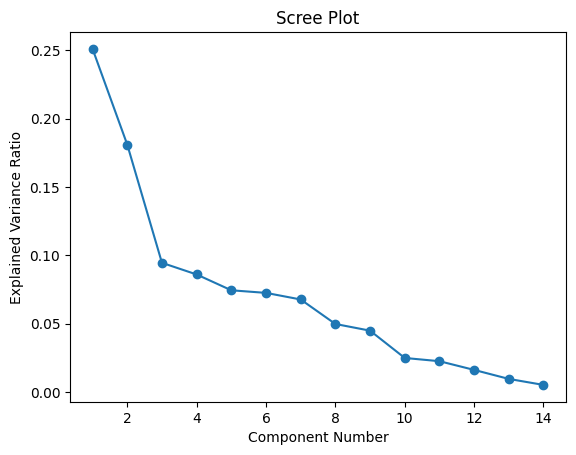

In [252]:
# Plot scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


In [253]:
eigenvalues=pca.explained_variance_
print(eigenvalues)

[3.53191689 2.54661838 1.32991935 1.21006408 1.04716811 1.0203746
 0.95257156 0.70029726 0.63152549 0.35046953 0.31717464 0.22751778
 0.13475353 0.07292723]


In [254]:
eigenvector=pca.components_
print(eigenvector.shape)
eigen_df=pd.DataFrame(eigenvector,columns=[f'PCA{i+1}' for i in range(df_con.shape[1])])
eigen_df.head(5)

(14, 14)


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14
0,-0.152803,-0.127389,-0.030275,-0.070642,0.311925,0.440930,0.014177,0.143508,0.450367,0.435054,0.028267,-0.021674,0.486026,0.111409
1,-0.089260,0.017747,0.063936,0.119729,-0.003496,0.063956,0.554995,-0.038526,-0.104522,-0.034872,0.591911,-0.000664,-0.092168,0.537303
2,0.584476,0.592714,-0.150483,0.190979,0.336402,0.029966,-0.106600,-0.200101,-0.073185,0.258589,0.072128,0.015067,-0.006450,0.069253
3,0.132415,0.283370,-0.253128,0.342359,-0.455713,0.015648,0.090756,0.597398,0.254852,-0.168898,0.061669,-0.108347,0.176035,-0.088527
4,0.088368,-0.249155,-0.596311,-0.109673,0.160574,-0.091849,0.040765,0.218136,-0.105648,0.002379,0.027466,0.679300,-0.061433,0.043464


Number of components with eigenvalue > 1: 6


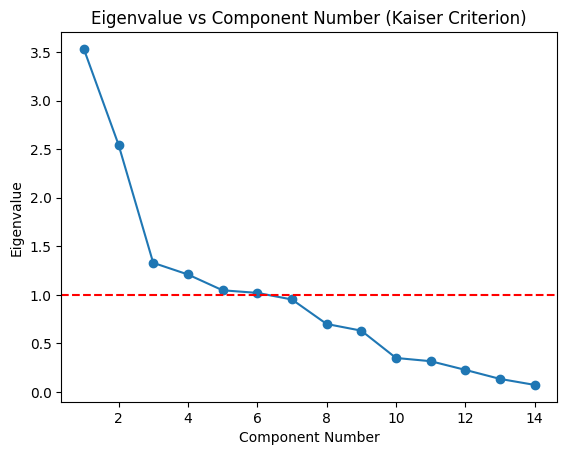

In [255]:
n_components = np.sum(eigenvalues > 1)
print(f"Number of components with eigenvalue > 1: {n_components}")

# Optional: Plot the eigenvalues to visualize the decision
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.axhline(y=1, color='r', linestyle='--')  # Draw line at eigenvalue = 1
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalue vs Component Number (Kaiser Criterion)')
plt.show()

In [256]:
#total variabtion explain by first 8 components

total_va=(eigenvalues[:n_components].sum()/eigenvalues.sum())*100
print(total_va)

75.93146310174335


In [257]:
selected_eigenvectors = pd.DataFrame(eigenvector[:,:n_components], columns=[f'PCA{i+1}' for i in range(n_components)])
selected_eigenvectors.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
0,-0.152803,-0.127389,-0.030275,-0.070642,0.311925,0.440930
1,-0.089260,0.017747,0.063936,0.119729,-0.003496,0.063956
2,0.584476,0.592714,-0.150483,0.190979,0.336402,0.029966
3,0.132415,0.283370,-0.253128,0.342359,-0.455713,0.015648
4,0.088368,-0.249155,-0.596311,-0.109673,0.160574,-0.091849


In [258]:
selected_eigenvectors.shape

(14, 6)

#### To normilize the eigen vetors (ev/sqrt(corr.lamda))

In [259]:
selected=eigenvalues[:n_components]
print(selected)

[3.53191689 2.54661838 1.32991935 1.21006408 1.04716811 1.0203746 ]


In [260]:
Normalize_eigenvector = pd.DataFrame(selected_eigenvectors / eigenvalues.sum())
Normalize_eigenvector.head()


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
0,-0.010858,-0.009052,-0.002151,-0.005020,0.022164,0.031331
1,-0.006342,0.001261,0.004543,0.008508,-0.000248,0.004545
2,0.041531,0.042116,-0.010693,0.013570,0.023904,0.002129
3,0.009409,0.020135,-0.017986,0.024327,-0.032381,0.001112
4,0.006279,-0.017704,-0.042372,-0.007793,0.011410,-0.006526


In [261]:
## make eigen values as fraction

selected_ra=eigenvalues[:n_components]/eigenvalues.sum()
print(selected_ra)

[0.25096582 0.18095391 0.09449948 0.08598298 0.07440815 0.0725043 ]


In [262]:
nor_ve=eigenvector[:,:n_components]/ np.sqrt(selected)


In [263]:
eigen_loadings = pd.DataFrame(nor_ve, index=df_con.columns, columns=[f'pca{i+1}' for i in range(n_components)])
eigen_loadings.head(21)

,pca1,pca2,pca3,pca4,pca5,pca6
Technical Score_JD,-0.081307,-0.079827,-0.026252,-0.064218,0.304819,0.436505
Programming Score_JD,-0.047495,0.011121,0.055441,0.108842,-0.003416,0.063315
Soft Score_with_JD,0.311000,0.371419,-0.130489,0.173613,0.328739,0.029666
Education_match_Score_with_JD,0.070458,0.177571,-0.219497,0.311227,-0.445331,0.015491
Years of Experience in this Company,0.047021,-0.156131,-0.517082,-0.099700,0.156916,-0.090927
KPI,0.129336,0.073024,0.543963,-0.080564,-0.187165,0.148747
Employee Satisfaction Score,-0.127273,-0.098456,-0.019765,0.765192,0.000576,0.046363
Experience in Years Previous Positions,-0.025091,-0.056830,0.339006,0.251006,0.379636,-0.268481
Goals Score,0.367377,-0.411883,0.042547,0.110556,-0.099188,0.018030
Competency Score,-0.019557,0.020996,-0.024539,-0.069068,-0.063434,-0.331875


In [264]:
def generate_pca_equation_dict(loadings_array, feature_names):
    # Convert to DataFrame for ease of processing
    loading_df = pd.DataFrame(loadings_array, columns=[f"PCA{i+1}" for i in range(loadings_array.shape[1])], index=feature_names)

    pca_equation_dict = {}

    # Debugging prints
    # print("Loading DataFrame:\n", loading_df.head())

    # Iterate through each PCA component
    for pca in loading_df.columns:
        terms = []
        for feature, loading in loading_df[pca].items():
            terms.append(f"{loading:.5f} * df_di['{feature}']")  # Format coefficients
        equation = " + ".join(terms)
        pca_equation_dict[pca] = equation

    return pca_equation_dict


# Generate the equation dictionary
feature_names = eigen_loadings.index  # Ensure correct feature names
pca_equations = generate_pca_equation_dict(eigen_loadings.values, feature_names)

# Print the generated PCA equations
for pca, eq in pca_equations.items():
    print(f"{pca}= {eq}\n")



PCA1= -0.08131 * df_di['Technical Score_JD'] + -0.04750 * df_di['Programming Score_JD'] + 0.31100 * df_di['Soft Score_with_JD'] + 0.07046 * df_di['Education_match_Score_with_JD'] + 0.04702 * df_di['Years of Experience in this Company'] + 0.12934 * df_di['KPI'] + -0.12727 * df_di['Employee Satisfaction Score'] + -0.02509 * df_di['Experience in Years Previous Positions'] + 0.36738 * df_di['Goals Score'] + -0.01956 * df_di['Competency Score'] + 0.00380 * df_di['Cultural Value Score'] + -0.02622 * df_di['Additional Accomplishment Score'] + -0.02616 * df_di['Potential Assessment Score'] + 0.00887 * df_di['Trait Assessment Score']

PCA2= -0.07983 * df_di['Technical Score_JD'] + 0.01112 * df_di['Programming Score_JD'] + 0.37142 * df_di['Soft Score_with_JD'] + 0.17757 * df_di['Education_match_Score_with_JD'] + -0.15613 * df_di['Years of Experience in this Company'] + 0.07302 * df_di['KPI'] + -0.09846 * df_di['Employee Satisfaction Score'] + -0.05683 * df_di['Experience in Years Previous Positi

In [265]:
suitability_equations = []

for i, (pca, equation) in enumerate(pca_equations.items()):
    if i < len(selected_ra):
        suitability = f"{selected_ra[i]:.5f} *  ({equation})"
        suitability_equations.append(suitability)
        

# Combine all equations into one final equation
final_equation = " + ".join(suitability_equations)

print("Final Suitability Equation:\n", final_equation)



Final Suitability Equation:
 0.25097 *  (-0.08131 * df_di['Technical Score_JD'] + -0.04750 * df_di['Programming Score_JD'] + 0.31100 * df_di['Soft Score_with_JD'] + 0.07046 * df_di['Education_match_Score_with_JD'] + 0.04702 * df_di['Years of Experience in this Company'] + 0.12934 * df_di['KPI'] + -0.12727 * df_di['Employee Satisfaction Score'] + -0.02509 * df_di['Experience in Years Previous Positions'] + 0.36738 * df_di['Goals Score'] + -0.01956 * df_di['Competency Score'] + 0.00380 * df_di['Cultural Value Score'] + -0.02622 * df_di['Additional Accomplishment Score'] + -0.02616 * df_di['Potential Assessment Score'] + 0.00887 * df_di['Trait Assessment Score']) + 0.18095 *  (-0.07983 * df_di['Technical Score_JD'] + 0.01112 * df_di['Programming Score_JD'] + 0.37142 * df_di['Soft Score_with_JD'] + 0.17757 * df_di['Education_match_Score_with_JD'] + -0.15613 * df_di['Years of Experience in this Company'] + 0.07302 * df_di['KPI'] + -0.09846 * df_di['Employee Satisfaction Score'] + -0.05683 *

In [266]:
train_df["Suitability_score"]=eval(final_equation)

In [267]:
train_df.head()

,EmployeeCode,Technical Score_JD,Programming Score_JD,Soft Score_with_JD,Education_match_Score_with_JD,Gender,Age,Department,JobCategory,ProficiencyLevel,...,Number of Goal Assigned,Number of Goals Achieved,Final Score,Goals Score,Competency Score,Cultural Value Score,Additional Accomplishment Score,Potential Assessment Score,Trait Assessment Score,Suitability_score
277,EMP9583,0.126139,0.722849,0.416863,0.538119,Male,43,Data and AI,Data Engineer,Senior,...,13,10,35.000000,76.923077,30.368986,73.022731,3.13,48.247014,51.022007,9.131722
192,EMP9430,0.063319,0.240133,0.351937,0.638099,Female,36,Data and AI,Data Analyst,Mid-Level,...,14,11,42.939855,78.571429,21.938123,55.663265,4.93,58.878049,46.838391,7.422423
20,EMP9041,0.464104,0.787505,0.525904,0.537262,Male,36,Data and AI,Data Scientist,Mid-Level,...,15,9,61.009778,60.000000,31.378751,62.786462,7.92,50.760558,50.995299,7.494810
421,EMP9852,0.113330,0.787505,0.395103,0.635009,Female,49,Data and AI,Data Engineer,Senior,...,15,12,50.532796,80.000000,43.946853,80.879658,1.35,63.774726,60.585681,9.119958
317,EMP9647,0.170640,0.539208,0.363574,0.626668,Female,29,Data and AI,Data Engineer,Mid-Level,...,3,2,44.279031,66.666667,25.223166,79.507026,6.88,58.297155,54.687405,10.648612


In [268]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df['Suitability Score Scaled'] = scaler.fit_transform(train_df[['Suitability_score']])
train_df.to_excel("aa.xlsx",index=False)

In [269]:
#test set
def generate_pca_equation_dict(loadings_array, feature_names):
    # Convert to DataFrame for ease of processing
    loading_df = pd.DataFrame(loadings_array, columns=[f"PCA{i+1}" for i in range(loadings_array.shape[1])], index=feature_names)

    pca_equation_dict = {}

    # Debugging prints
    # print("Loading DataFrame:\n", loading_df.head())

    # Iterate through each PCA component
    for pca in loading_df.columns:
        terms = []
        for feature, loading in loading_df[pca].items():
            terms.append(f"{loading:.5f} * test_df['{feature}']")  # Format coefficients
        equation = " + ".join(terms)
        pca_equation_dict[pca] = equation

    return pca_equation_dict


# Generate the equation dictionary
feature_names = eigen_loadings.index  # Ensure correct feature names
pca_equations1 = generate_pca_equation_dict(eigen_loadings.values, feature_names)

# Print the generated PCA equations
for pca, eq in pca_equations1.items():
    print(f"{pca}= {eq}\n")


PCA1= -0.08131 * test_df['Technical Score_JD'] + -0.04750 * test_df['Programming Score_JD'] + 0.31100 * test_df['Soft Score_with_JD'] + 0.07046 * test_df['Education_match_Score_with_JD'] + 0.04702 * test_df['Years of Experience in this Company'] + 0.12934 * test_df['KPI'] + -0.12727 * test_df['Employee Satisfaction Score'] + -0.02509 * test_df['Experience in Years Previous Positions'] + 0.36738 * test_df['Goals Score'] + -0.01956 * test_df['Competency Score'] + 0.00380 * test_df['Cultural Value Score'] + -0.02622 * test_df['Additional Accomplishment Score'] + -0.02616 * test_df['Potential Assessment Score'] + 0.00887 * test_df['Trait Assessment Score']

PCA2= -0.07983 * test_df['Technical Score_JD'] + 0.01112 * test_df['Programming Score_JD'] + 0.37142 * test_df['Soft Score_with_JD'] + 0.17757 * test_df['Education_match_Score_with_JD'] + -0.15613 * test_df['Years of Experience in this Company'] + 0.07302 * test_df['KPI'] + -0.09846 * test_df['Employee Satisfaction Score'] + -0.05683 * 

In [270]:
suitability_equations = []

for i, (pca, equation) in enumerate(pca_equations1.items()):
    if i < len(selected_ra):
        suitability = f"{selected_ra[i]:.5f} *  ({equation})"
        suitability_equations.append(suitability)
        

# Combine all equations into one final equation
final_equation1 = " + ".join(suitability_equations)

print("Final Suitability Equation:\n", final_equation1)

Final Suitability Equation:
 0.25097 *  (-0.08131 * test_df['Technical Score_JD'] + -0.04750 * test_df['Programming Score_JD'] + 0.31100 * test_df['Soft Score_with_JD'] + 0.07046 * test_df['Education_match_Score_with_JD'] + 0.04702 * test_df['Years of Experience in this Company'] + 0.12934 * test_df['KPI'] + -0.12727 * test_df['Employee Satisfaction Score'] + -0.02509 * test_df['Experience in Years Previous Positions'] + 0.36738 * test_df['Goals Score'] + -0.01956 * test_df['Competency Score'] + 0.00380 * test_df['Cultural Value Score'] + -0.02622 * test_df['Additional Accomplishment Score'] + -0.02616 * test_df['Potential Assessment Score'] + 0.00887 * test_df['Trait Assessment Score']) + 0.18095 *  (-0.07983 * test_df['Technical Score_JD'] + 0.01112 * test_df['Programming Score_JD'] + 0.37142 * test_df['Soft Score_with_JD'] + 0.17757 * test_df['Education_match_Score_with_JD'] + -0.15613 * test_df['Years of Experience in this Company'] + 0.07302 * test_df['KPI'] + -0.09846 * test_df['

In [271]:
scaler = MinMaxScaler()
test_df["score"]=eval(final_equation1)
test_df['Suitability Score Scaled'] = scaler.fit_transform(test_df[['score']])

In [272]:
test_df.shape

(48, 31)

In [273]:
test_df.to_excel("test.xlsx",index=False)

In [274]:
train_df.shape

(192, 31)

In [275]:
feature_importance = np.abs(eigenvector[:n_components])  # Take absolute value for importance
overall_importance = feature_importance.sum(axis=0)  # Sum across rows (principal components)
print(overall_importance)
# Normalize to percentages
overall_importance_percentages = (overall_importance / overall_importance.sum()) *100

# Sort feature importances in descending order
sorted_indices = np.argsort(overall_importance_percentages)[::-1]  # Sort indices in descending order

# Print overall feature importance as percentages with column names in descending order
print("\nOverall Feature Importance (as %):")
for idx in sorted_indices:
    print(f"{df_con.columns[idx]}: {overall_importance_percentages[idx]:.2f}%")

[1.29038834 1.38690821 1.72144136 0.92200553 1.45963824 0.79260343
 0.81487847 1.22466719 1.15190017 1.01760294 0.82618166 1.46553791
 0.92523531 0.90003518]

Overall Feature Importance (as %):
Soft Score_with_JD: 10.83%
Additional Accomplishment Score: 9.22%
Years of Experience in this Company: 9.18%
Programming Score_JD: 8.72%
Technical Score_JD: 8.12%
Experience in Years Previous Positions: 7.70%
Goals Score: 7.25%
Competency Score: 6.40%
Potential Assessment Score: 5.82%
Education_match_Score_with_JD: 5.80%
Trait Assessment Score: 5.66%
Cultural Value Score: 5.20%
Employee Satisfaction Score: 5.13%
KPI: 4.99%


## Factor Analysis

In [276]:
## make eigen values as fraction

selected_ra=eigenvalues[:n_components]/eigenvalues.sum()
print(selected_ra)

[0.25096582 0.18095391 0.09449948 0.08598298 0.07440815 0.0725043 ]


In [277]:
from factor_analyzer import calculate_kmo
import pandas as pd

# Assuming df_con contains only numeric variables for factor analysis
kmo_all, kmo_model = calculate_kmo(df_con)

# Create a DataFrame to display KMO values for each variable
kmo_results = pd.DataFrame({
    'Variable': df_con.columns,
    'KMO Value': kmo_all
})

# Display results
print(f"Overall KMO Value: {kmo_model:.3f}\n")
print("KMO Values for Each Variable:")
print(kmo_results)


Overall KMO Value: 0.711

KMO Values for Each Variable:
                                  Variable  KMO Value
0                       Technical Score_JD   0.670414
1                     Programming Score_JD   0.532232
2                       Soft Score_with_JD   0.525744
3            Education_match_Score_with_JD   0.728895
4      Years of Experience in this Company   0.662367
5                                      KPI   0.923224
6              Employee Satisfaction Score   0.686515
7   Experience in Years Previous Positions   0.740451
8                              Goals Score   0.704707
9                         Competency Score   0.758387
10                    Cultural Value Score   0.603253
11         Additional Accomplishment Score   0.221870
12              Potential Assessment Score   0.714697
13                  Trait Assessment Score   0.714508


In [278]:
from scipy.stats import bartlett

# Perform Bartlett's Test
chi2_stat, p_value = bartlett(*df_di.T.values)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: Variables are correlated.")
else:
    print("Fail to reject the null hypothesis: Variables are uncorrelated.")


Chi-Square Statistic: 6642.872108138861
P-Value: 0.0
Reject the null hypothesis: Variables are correlated.


In [324]:
from sklearn.decomposition import FactorAnalysis
num_factors =n_components  # You can adjust this number
fa = FactorAnalysis(n_components=num_factors,rotation="varimax",random_state=42)
# fa = FactorAnalysis(n_components=num_factors,random_state=42)
fa.fit(df_con)

# Step 3: Extract Factor Loadings
factor_loadings = pd.DataFrame(fa.components_.T, index=df_con.columns, columns=[f'Factor{i+1}' for i in range(num_factors)])

In [325]:
factor_loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
Technical Score_JD,0.181978,0.109910,-0.002628,-0.472014,0.040543,0.001879
Programming Score_JD,0.119419,-0.024547,-0.038141,-0.653091,-0.009467,0.000618
Soft Score_with_JD,0.017368,-0.053028,-0.073424,0.043009,0.003014,0.211802
Education_match_Score_with_JD,0.044862,-0.122518,-0.101822,-0.155282,0.078333,-0.061782
Years of Experience in this Company,-0.205607,-0.020429,0.789114,0.041570,0.082266,0.080662
KPI,-0.706627,-0.168499,0.279007,0.064589,-0.073399,0.200372
Employee Satisfaction Score,0.036021,-0.859161,-0.091847,0.096380,-0.275441,-0.053483
Experience in Years Previous Positions,-0.287870,-0.001835,-0.098261,0.033087,-0.040515,-0.359544
Goals Score,-0.956028,0.056616,0.036738,0.042096,0.016402,-0.005213
Competency Score,-0.534173,-0.013873,0.729236,-0.018912,-0.077792,-0.082165


In [281]:
df_con.columns

Index(['Technical Score_JD', 'Programming Score_JD', 'Soft Score_with_JD',
       'Education_match_Score_with_JD', 'Years of Experience in this Company',
       'KPI', 'Employee Satisfaction Score',
       'Experience in Years Previous Positions', 'Goals Score',
       'Competency Score', 'Cultural Value Score',
       'Additional Accomplishment Score', 'Potential Assessment Score',
       'Trait Assessment Score'],
      dtype='object')

In [ ]:
# Extract top contributing variables for each factor to understand their meaning
top_contributors = factor_loadings.abs().idxmax()

# Create a dictionary to map factors to their strongest influencing variables
factor_interpretation = {factor: feature for factor, feature in top_contributors.items()}

# Generate human-readable equations for each factor
equations = {}
for factor in factor_loadings.columns:
    equation = " + ".join(
        f"({round(factor_loadings.loc[feature, factor], 3)} * train_df['{feature}'])"
        for feature in factor_loadings.index
    )
    equations[factor] = f"{factor} = {equation}"

# Convert to DataFrame for display
equations_df = pd.DataFrame.from_dict(equations, orient='index', columns=["Equation"])

# # Display the interpretations and equations
# tools.display_dataframe_to_user(name="Factor Interpretations", dataframe=pd.DataFrame.from_dict(factor_interpretation, orient='index', columns=["Top Contributing Feature"]))
# tools.display_dataframe_to_user(name="Factor Equations", dataframe=equations_df)


In [332]:
equations_df.to_excel("Equat.xlsx",index=False)

In [282]:
factor_loadings = np.abs(fa.components_.T)  # Absolute values of loadings
feature_importance_fa = np.sum(factor_loadings, axis=1)  # Sum across factors

# Create DataFrame
fa_importance_df = pd.DataFrame({'Feature': df_con.columns, 'Importance': feature_importance_fa})
fa_importance_df = fa_importance_df.sort_values(by='Importance', ascending=False)
fa_importance_df


,Feature,Importance
5,KPI,1.492492
9,Competency Score,1.456152
6,Employee Satisfaction Score,1.412333
13,Trait Assessment Score,1.383707
12,Potential Assessment Score,1.346133
4,Years of Experience in this Company,1.219648
10,Cultural Value Score,1.164412
8,Goals Score,1.113094
1,Programming Score_JD,0.845284
7,Experience in Years Previous Positions,0.821112


In [316]:

def generate_fa_equation_dict(loadings_array, feature_names):
    # Convert to DataFrame for ease of processing
    loading_df = pd.DataFrame(loadings_array, columns=[f"fa{i+1}" for i in range(loadings_array.shape[1])], index=feature_names)

    fa_equation_dict = {}

    # Debugging prints
    # print("Loading DataFrame:\n", loading_df.head())

    # Iterate through each fa component
    for fa in loading_df.columns:
        terms = []
        for feature, loading in loading_df[fa].items():
            terms.append(f"{loading:.5f} * train_df['{feature}']")  # Format coefficients
        equation = " + ".join(terms)
        fa_equation_dict[fa] = equation

    return fa_equation_dict


# Generate the equation dictionary
feature_names = eigen_loadings.index  # Ensure correct feature names
FA_equations = generate_fa_equation_dict(factor_loadings, feature_names)

# Print the generated fa equations
for fa, eq in FA_equations.items():
    print(f"{fa}= {eq}\n")



fa1= 0.18198 * train_df['Technical Score_JD'] + 0.11942 * train_df['Programming Score_JD'] + 0.01737 * train_df['Soft Score_with_JD'] + 0.04486 * train_df['Education_match_Score_with_JD'] + 0.20561 * train_df['Years of Experience in this Company'] + 0.70663 * train_df['KPI'] + 0.03602 * train_df['Employee Satisfaction Score'] + 0.28787 * train_df['Experience in Years Previous Positions'] + 0.95603 * train_df['Goals Score'] + 0.53417 * train_df['Competency Score'] + 0.01692 * train_df['Cultural Value Score'] + 0.02313 * train_df['Additional Accomplishment Score'] + 0.93649 * train_df['Potential Assessment Score'] + 0.02796 * train_df['Trait Assessment Score']

fa2= 0.10991 * train_df['Technical Score_JD'] + 0.02455 * train_df['Programming Score_JD'] + 0.05303 * train_df['Soft Score_with_JD'] + 0.12252 * train_df['Education_match_Score_with_JD'] + 0.02043 * train_df['Years of Experience in this Company'] + 0.16850 * train_df['KPI'] + 0.85916 * train_df['Employee Satisfaction Score'] + 0.

In [284]:
suitability_equations = []

for i, (fa, equation) in enumerate(FA_equations.items()):
    if i < len(selected_ra):
        suitability = f"{selected_ra[i]:.5f} *  ({equation})"
        suitability_equations.append(suitability)
        

# Combine all equations into one final equation
final_equationfor_FA = " + ".join(suitability_equations)

print("Final Suitability Equation:\n", final_equationfor_FA)

Final Suitability Equation:
 0.25097 *  (0.18198 * train_df['Technical Score_JD'] + 0.11942 * train_df['Programming Score_JD'] + 0.01737 * train_df['Soft Score_with_JD'] + 0.04486 * train_df['Education_match_Score_with_JD'] + 0.20561 * train_df['Years of Experience in this Company'] + 0.70663 * train_df['KPI'] + 0.03602 * train_df['Employee Satisfaction Score'] + 0.28787 * train_df['Experience in Years Previous Positions'] + 0.95603 * train_df['Goals Score'] + 0.53417 * train_df['Competency Score'] + 0.01692 * train_df['Cultural Value Score'] + 0.02313 * train_df['Additional Accomplishment Score'] + 0.93649 * train_df['Potential Assessment Score'] + 0.02796 * train_df['Trait Assessment Score']) + 0.18095 *  (0.10991 * train_df['Technical Score_JD'] + 0.02455 * train_df['Programming Score_JD'] + 0.05303 * train_df['Soft Score_with_JD'] + 0.12252 * train_df['Education_match_Score_with_JD'] + 0.02043 * train_df['Years of Experience in this Company'] + 0.16850 * train_df['KPI'] + 0.85916 *

In [285]:
scaler = MinMaxScaler()
train_df["FA_score"]=eval(final_equationfor_FA)
train_df["out of max"]=(eval(final_equationfor_FA)/316.33264)*100
train_df['Suitability Score Scaled_fa'] = scaler.fit_transform(train_df[['FA_score']])

In [286]:
train_df.head()

,EmployeeCode,Technical Score_JD,Programming Score_JD,Soft Score_with_JD,Education_match_Score_with_JD,Gender,Age,Department,JobCategory,ProficiencyLevel,...,Competency Score,Cultural Value Score,Additional Accomplishment Score,Potential Assessment Score,Trait Assessment Score,Suitability_score,Suitability Score Scaled,FA_score,out of max,Suitability Score Scaled_fa
277,EMP9583,0.126139,0.722849,0.416863,0.538119,Male,43,Data and AI,Data Engineer,Senior,...,30.368986,73.022731,3.13,48.247014,51.022007,9.131722,0.683173,95.397188,30.157238,0.699282
192,EMP9430,0.063319,0.240133,0.351937,0.638099,Female,36,Data and AI,Data Analyst,Mid-Level,...,21.938123,55.663265,4.93,58.878049,46.838391,7.422423,0.461912,87.272438,27.588819,0.578850
20,EMP9041,0.464104,0.787505,0.525904,0.537262,Male,36,Data and AI,Data Scientist,Mid-Level,...,31.378751,62.786462,7.92,50.760558,50.995299,7.494810,0.471283,86.959166,27.489786,0.574206
421,EMP9852,0.113330,0.787505,0.395103,0.635009,Female,49,Data and AI,Data Engineer,Senior,...,43.946853,80.879658,1.35,63.774726,60.585681,9.119958,0.681650,110.048467,34.788843,0.916456
317,EMP9647,0.170640,0.539208,0.363574,0.626668,Female,29,Data and AI,Data Engineer,Mid-Level,...,25.223166,79.507026,6.88,58.297155,54.687405,10.648612,0.879527,99.960902,31.599933,0.766929


In [287]:
train_df.to_excel("FAyoko.xlsx",index=False)

In [288]:
nu1=df_jdmatch.merge(train_df[['EmployeeCode','FA_score']],on="EmployeeCode",how="inner")

In [289]:
nu1.to_excel('x_train.xlsx',index=False)

### for the test set 

In [290]:

def generate_fa_equation_dict(loadings_array, feature_names):
    # Convert to DataFrame for ease of processing
    loading_df = pd.DataFrame(loadings_array, columns=[f"fa{i+1}" for i in range(loadings_array.shape[1])], index=feature_names)

    fa_equation_dict = {}

    # Debugging prints
    # print("Loading DataFrame:\n", loading_df.head())

    # Iterate through each fa component
    for fa in loading_df.columns:
        terms = []
        for feature, loading in loading_df[fa].items():
            terms.append(f"{loading:.5f} * test_df['{feature}']")  # Format coefficients
        equation = " + ".join(terms)
        fa_equation_dict[fa] = equation

    return fa_equation_dict


# Generate the equation dictionary
feature_names = eigen_loadings.index  # Ensure correct feature names
FA_equations_test = generate_fa_equation_dict(factor_loadings, feature_names)

# Print the generated fa equations
for fa, eq in FA_equations_test.items():
    print(f"{fa}= {eq}\n")


fa1= 0.18198 * test_df['Technical Score_JD'] + 0.11942 * test_df['Programming Score_JD'] + 0.01737 * test_df['Soft Score_with_JD'] + 0.04486 * test_df['Education_match_Score_with_JD'] + 0.20561 * test_df['Years of Experience in this Company'] + 0.70663 * test_df['KPI'] + 0.03602 * test_df['Employee Satisfaction Score'] + 0.28787 * test_df['Experience in Years Previous Positions'] + 0.95603 * test_df['Goals Score'] + 0.53417 * test_df['Competency Score'] + 0.01692 * test_df['Cultural Value Score'] + 0.02313 * test_df['Additional Accomplishment Score'] + 0.93649 * test_df['Potential Assessment Score'] + 0.02796 * test_df['Trait Assessment Score']

fa2= 0.10991 * test_df['Technical Score_JD'] + 0.02455 * test_df['Programming Score_JD'] + 0.05303 * test_df['Soft Score_with_JD'] + 0.12252 * test_df['Education_match_Score_with_JD'] + 0.02043 * test_df['Years of Experience in this Company'] + 0.16850 * test_df['KPI'] + 0.85916 * test_df['Employee Satisfaction Score'] + 0.00183 * test_df['Expe

In [291]:
suitability_equations = []

for i, (fa, equation) in enumerate(FA_equations_test.items()):
    if i < len(selected_ra):
        suitability = f"{selected_ra[i]:.5f} *  ({equation})"
        suitability_equations.append(suitability)
        

# Combine all equations into one final equation
final_equationfor_FA_test = " + ".join(suitability_equations)

print("Final Suitability Equation:\n", final_equationfor_FA_test)

Final Suitability Equation:
 0.25097 *  (0.18198 * test_df['Technical Score_JD'] + 0.11942 * test_df['Programming Score_JD'] + 0.01737 * test_df['Soft Score_with_JD'] + 0.04486 * test_df['Education_match_Score_with_JD'] + 0.20561 * test_df['Years of Experience in this Company'] + 0.70663 * test_df['KPI'] + 0.03602 * test_df['Employee Satisfaction Score'] + 0.28787 * test_df['Experience in Years Previous Positions'] + 0.95603 * test_df['Goals Score'] + 0.53417 * test_df['Competency Score'] + 0.01692 * test_df['Cultural Value Score'] + 0.02313 * test_df['Additional Accomplishment Score'] + 0.93649 * test_df['Potential Assessment Score'] + 0.02796 * test_df['Trait Assessment Score']) + 0.18095 *  (0.10991 * test_df['Technical Score_JD'] + 0.02455 * test_df['Programming Score_JD'] + 0.05303 * test_df['Soft Score_with_JD'] + 0.12252 * test_df['Education_match_Score_with_JD'] + 0.02043 * test_df['Years of Experience in this Company'] + 0.16850 * test_df['KPI'] + 0.85916 * test_df['Employee S

In [292]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [293]:

test_df["FA_score"]=eval(final_equationfor_FA_test)
test_df["min_max"]=scaler.fit_transform(test_df[["FA_score"]])


In [294]:
test_df.head()

,EmployeeCode,Technical Score_JD,Programming Score_JD,Soft Score_with_JD,Education_match_Score_with_JD,Gender,Age,Department,JobCategory,ProficiencyLevel,...,Goals Score,Competency Score,Cultural Value Score,Additional Accomplishment Score,Potential Assessment Score,Trait Assessment Score,score,Suitability Score Scaled,FA_score,min_max
278,EMP9585,0.198036,0.787505,0.493388,0.619521,Female,46,Data and AI,Data Analyst,Senior,...,60.000000,27.473643,74.149691,0.13,42.119957,67.216117,7.838604,0.303190,90.842548,0.652944
335,EMP9681,0.143408,0.539208,0.266211,0.537262,Male,55,Data and AI,Data Engineer,Expert,...,73.333333,30.301516,78.776555,8.06,54.178208,60.092307,9.679338,0.762654,102.280761,0.812041
134,EMP9305,0.494283,0.787505,0.330668,0.599076,Female,50,Data and AI,Data Scientist,Expert,...,53.333333,31.878374,79.673085,8.58,46.556185,64.511744,8.049535,0.355841,96.999740,0.738586
434,EMP9874,0.451817,0.722849,0.306630,0.638099,Male,57,Data and AI,Data Scientist,Expert,...,66.666667,24.018974,53.467355,1.50,55.473937,49.828493,7.172862,0.137015,84.849701,0.569588
167,EMP9381,0.109248,0.539208,0.451360,0.626668,Male,24,Data and AI,Data Engineer,Junior,...,0.000000,8.378287,55.738057,0.72,12.481547,32.731582,6.890440,0.066520,43.899280,0.000000


In [295]:
test_df.to_excel("fa_test.xlsx",index=False)

In [296]:
nu=df_jdmatch.merge(test_df[['EmployeeCode','min_max']],on="EmployeeCode",how="inner")

In [297]:
nu.tail(5)

,EmployeeCode,JD match Score,min_max
43,EMP9425,0.454456,0.690558
44,EMP9428,0.578734,1.000000
45,EMP9518,0.608115,0.703926
46,EMP9700,0.498140,0.000502
47,EMP9021,0.639683,0.870328


In [298]:
nu.to_excel("x.xlsx",index=False)

In [299]:
nu[["JD match Score","min_max"]].corr()

,JD match Score,min_max
JD match Score,1.000000,0.385135
min_max,0.385135,1.000000


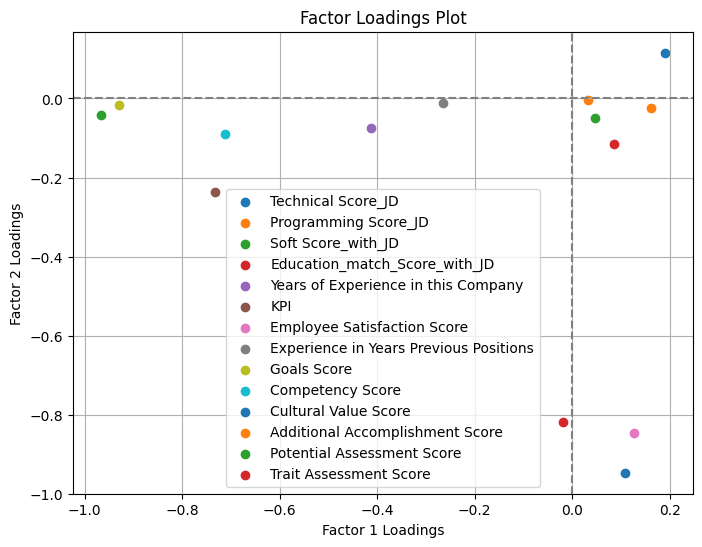

In [300]:
fa = FactorAnalysis(n_components=num_factors,random_state=42)
fa.fit(df_con)
plt.figure(figsize=(8, 6))
for i, feature in enumerate(feature_names):
    plt.scatter(fa.components_[0, i], fa.components_[1, i], label=feature)

# Adding horizontal and vertical lines
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

plt.title('Factor Loadings Plot')
plt.xlabel('Factor 1 Loadings')
plt.ylabel('Factor 2 Loadings')
plt.grid(True)
plt.legend()
plt.show()


In [301]:
import pandas as pd
df_last=pd.read_excel("C://Users//DanukaDilshanRathnay//Desktop//AI-Driven-Job-Role-Fit-Prediction//com//x.xlsx")


In [302]:
df_last['not_match_jd']=1-df_last['JD match Score']

In [303]:
df_last.head()

,EmployeeCode,JD match Score,min_max,not_match_jd
0,EMP9449,0.653565,0.547204,0.346435
1,EMP9798,0.627276,0.585256,0.372724
2,EMP9271,0.606090,0.775452,0.393910
3,EMP9931,0.498329,0.339699,0.501671
4,EMP9213,0.562582,0.799137,0.437418


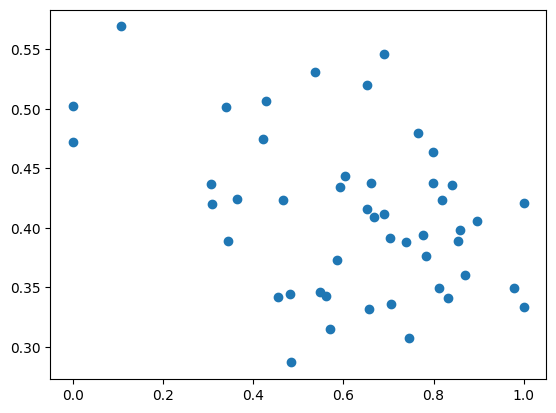

In [304]:
import matplotlib.pyplot as plt
plt.scatter(df_last['min_max'],df_last['not_match_jd'])

In [305]:
df_last[['min_max','not_match_jd']].corr()

,min_max,not_match_jd
min_max,1.000000,-0.385135
not_match_jd,-0.385135,1.000000


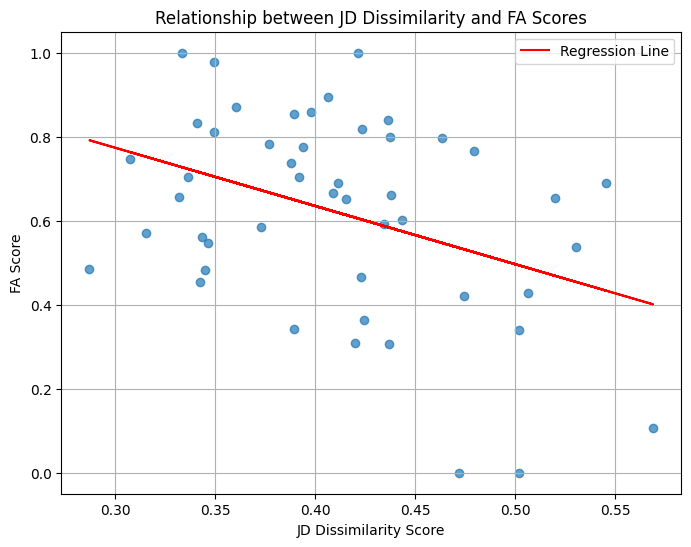

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                min_max   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     8.011
Date:                Thu, 27 Feb 2025   Prob (F-statistic):            0.00687
Time:                        10:22:32   Log-Likelihood:                 5.1049
No. Observations:                  48   AIC:                            -6.210
Df Residuals:                      46   BIC:                            -2.467
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.1895      0.204      5.835      0.000       0.779       1.600
not_match_jd    -1.3859      0.490     -2.830      0.007      -2.372      -0.400
==============================================================================
Omnibus:                        2.463   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.292   Jarque-Bera (JB):                2.286
Skew:                          -0.457   Prob(JB):                        0.319
Kurtosis:                       2.445   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [306]:
import statsmodels.api as sm
# Regression
X = sm.add_constant(df_last['not_match_jd'])  # adding a constant for the intercept
model = sm.OLS(df_last['min_max'], X).fit()

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df_last['not_match_jd'], df_last['min_max'], alpha=0.7)
plt.plot(df_last['not_match_jd'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('JD Dissimilarity Score')
plt.ylabel('FA Score')
plt.title('Relationship between JD Dissimilarity and FA Scores')
plt.legend()
plt.grid(True)
plt.show()

model.summary()

In [307]:
df_con.head()

,Technical Score_JD,Programming Score_JD,Soft Score_with_JD,Education_match_Score_with_JD,Years of Experience in this Company,KPI,Employee Satisfaction Score,Experience in Years Previous Positions,Goals Score,Competency Score,Cultural Value Score,Additional Accomplishment Score,Potential Assessment Score,Trait Assessment Score
0,-1.061542,0.084294,0.131136,-1.824875,0.318296,0.113204,0.635023,0.119635,1.029374,0.373229,0.529476,-0.790757,0.212425,0.062267
1,-1.476588,-1.970142,-0.541868,0.005600,0.042392,-0.311215,-1.012823,-0.507960,1.117308,-0.594151,-1.302589,-0.168777,0.960230,-0.422383
2,1.171337,0.359472,1.261428,-1.840559,0.732154,1.268781,-1.409894,-1.135555,0.126590,0.489093,-0.550829,0.864401,0.389232,0.059173
3,-1.146171,0.359472,-0.094419,-0.050962,1.697821,1.888956,0.110708,-0.382441,1.193517,1.931192,1.358673,-1.405827,1.304671,1.170171
4,-0.767533,-0.697282,-0.421241,-0.203673,-0.923275,1.544712,1.800066,-0.507960,0.482232,-0.217216,1.213809,0.505035,0.919369,0.486885


In [308]:
fa.transform(df_con.values)

c:\Users\DanukaDilshanRathnay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but FactorAnalysis was fitted with feature names
  warnings.warn(


array([[-0.51736888, -0.52403776, -0.34665136,  0.32312814, -0.27138367,
         0.35721835],
       [-0.87154596,  1.0881167 , -0.91954619,  1.19248737,  1.2463954 ,
        -0.2940045 ],
       [-0.44157509,  0.61842646,  0.86141807, -0.72322967,  0.90533975,
         1.01410469],
       ...,
       [ 0.44987725,  0.54100909, -0.90164256, -0.60738542, -1.2710786 ,
        -0.52207664],
       [-0.94156678, -0.15251475, -1.1064287 ,  1.83403508,  1.51460795,
        -0.03945502],
       [ 0.73387571,  1.15260045,  0.14428819, -0.56800868, -0.27731007,
        -0.10621998]])

In [309]:
train_df.columns

Index(['EmployeeCode', 'Technical Score_JD', 'Programming Score_JD',
       'Soft Score_with_JD', 'Education_match_Score_with_JD', 'Gender', 'Age',
       'Department', 'JobCategory', 'ProficiencyLevel',
       'Education Qualifications', 'Years of Experience in this Company',
       'List of Software Skills', 'Projects Completed',
       'Professional Qualifications', 'KPI', 'Absentism Rate',
       'Employee Satisfaction Score', 'Experience in Years Previous Positions',
       'Total Experience in Years', 'Number of Goal Assigned',
       'Number of Goals Achieved', 'Final Score', 'Goals Score',
       'Competency Score', 'Cultural Value Score',
       'Additional Accomplishment Score', 'Potential Assessment Score',
       'Trait Assessment Score', 'Suitability_score',
       'Suitability Score Scaled', 'FA_score', 'out of max',
       'Suitability Score Scaled_fa'],
      dtype='object')

In [310]:
train_df1=train_df.drop(columns=['Suitability_score','Suitability Score Scaled','out of max',
       'Suitability Score Scaled_fa','Gender', 'Age',
       'Department', 'JobCategory', 'ProficiencyLevel',
       'Education Qualifications','List of Software Skills', 'Projects Completed',
       'Professional Qualifications','Absentism Rate', 'Number of Goal Assigned',
       'Number of Goals Achieved'],axis=1)

In [311]:
train_df1.head()

,EmployeeCode,Technical Score_JD,Programming Score_JD,Soft Score_with_JD,Education_match_Score_with_JD,Years of Experience in this Company,KPI,Employee Satisfaction Score,Experience in Years Previous Positions,Total Experience in Years,Final Score,Goals Score,Competency Score,Cultural Value Score,Additional Accomplishment Score,Potential Assessment Score,Trait Assessment Score,FA_score
277,EMP9583,0.126139,0.722849,0.416863,0.538119,11,41.047401,86.37,10,21,35.000000,76.923077,30.368986,73.022731,3.13,48.247014,51.022007,95.397188
192,EMP9430,0.063319,0.240133,0.351937,0.638099,9,37.894794,68.11,5,14,42.939855,78.571429,21.938123,55.663265,4.93,58.878049,46.838391,87.272438
20,EMP9041,0.464104,0.787505,0.525904,0.537262,14,49.631096,63.71,0,14,61.009778,60.000000,31.378751,62.786462,7.92,50.760558,50.995299,86.959166
421,EMP9852,0.113330,0.787505,0.395103,0.635009,21,54.237791,80.56,6,27,50.532796,80.000000,43.946853,80.879658,1.35,63.774726,60.585681,110.048467
317,EMP9647,0.170640,0.539208,0.363574,0.626668,2,51.680726,99.28,5,7,44.279031,66.666667,25.223166,79.507026,6.88,58.297155,54.687405,99.960902


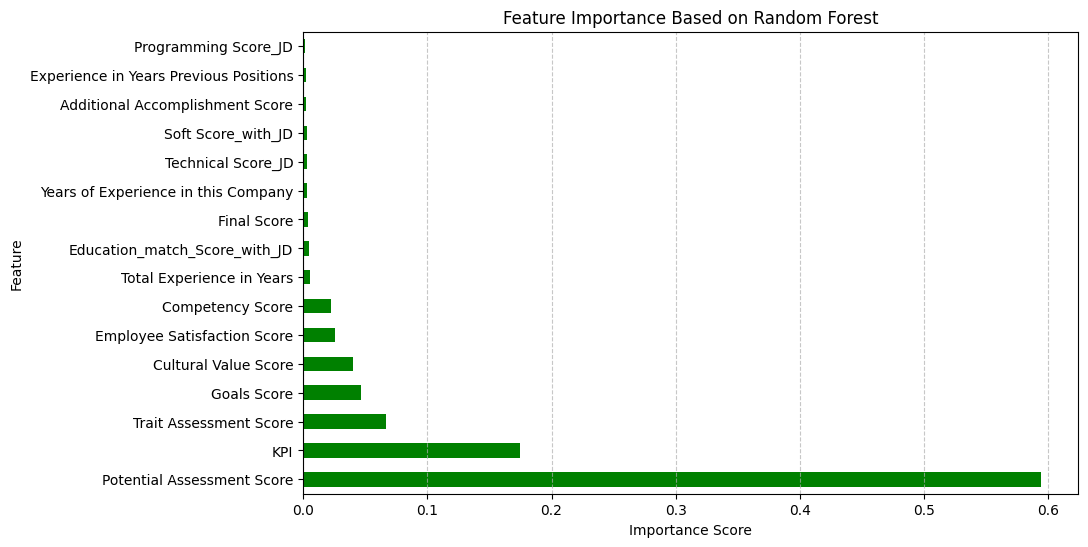

In [312]:
from sklearn.ensemble import RandomForestRegressor

# Prepare dataset for ML feature importance comparison
X = train_df1.drop(columns=["FA_score","EmployeeCode"]) # Independent variables (original features)
y = train_df1["FA_score"]  # Target variable

# Train a Random Forest model to estimate feature importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Extract feature importance from Random Forest
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot Feature Importance from Random Forest
plt.figure(figsize=(10, 6))
rf_feature_importance.plot(kind="barh", color="green")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance Based on Random Forest")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()




In [313]:
ml_predicted_scores = rf_model.predict(X)

# Normalize ML-predicted scores to the same scale as FA scores
ml_predicted_scores = (ml_predicted_scores - ml_predicted_scores.min()) / (ml_predicted_scores.max() - ml_predicted_scores.min()) * 100

# Compute the hybrid final performance score
train_df1["Hybrid Performance Score"] = (train_df1["Final Performance Score"] * 0.5) + (ml_predicted_scores * 0.5)

# Display the updated dataset with Hybrid Performance Score


KeyError: 'Final Performance Score'